In [51]:
# سلول 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# برای مدل شبکه عصبی
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# برای نمایش بهتر
pd.set_option('display.max_columns', None)
print("✅ کتابخانه‌ها بارگذاری شدند.")


✅ کتابخانه‌ها بارگذاری شدند.


In [52]:
# سلول 2
file_path = r"C:\Users\Win 10\Documents\aberham\Abraham_Viscosity_Model_with_vs.xlsx"

df = pd.read_excel(file_path)

print("✅ فایل با موفقیت خوانده شد.")
print("📊 شکل داده‌ها:", df.shape)
df.head()


✅ فایل با موفقیت خوانده شد.
📊 شکل داده‌ها: (5467, 19)


,solvent1,solvent2,x1,t,vs1,vs2,c1,e1,s1,a1,b1,v1,c2,e2,s2,a2,b2,v2,vsm
0,[4bmpy][Tf2N],[emim][EtSO4],0.0000,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01221
1,[4bmpy][Tf2N],[emim][EtSO4],1.0000,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.00706
2,[4bmpy][Tf2N],[emim][EtSO4],0.7740,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01008
3,[4bmpy][Tf2N],[emim][EtSO4],0.6659,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01168
4,[4bmpy][Tf2N],[emim][EtSO4],0.8823,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.00868


In [53]:
# سلول 3
print("📈 بررسی ستون‌ها و انواع داده‌ها:")
print(df.dtypes)
print("\n🔍 مقادیر گمشده در هر ستون:")
print(df.isnull().sum())
print("\n📊 آمار خلاصه‌ای از داده‌های عددی:")
df.describe()


📈 بررسی ستون‌ها و انواع داده‌ها:
solvent1     object
solvent2     object
x1          float64
t           float64
vs1         float64
vs2         float64
c1          float64
e1          float64
s1          float64
a1          float64
b1          float64
v1          float64
c2          float64
e2          float64
s2          float64
a2          float64
b2          float64
v2          float64
vsm         float64
dtype: object

🔍 مقادیر گمشده در هر ستون:
solvent1    0
solvent2    0
x1          0
t           0
vs1         0
vs2         0
c1          0
e1          0
s1          0
a1          0
b1          0
v1          0
c2          0
e2          0
s2          0
a2          0
b2          0
v2          0
vsm         0
dtype: int64

📊 آمار خلاصه‌ای از داده‌های عددی:


,x1,t,vs1,vs2,c1,e1,s1,a1,b1,v1,c2,e2,s2,a2,b2,v2,vsm
count,5467.000000,5467.000000,5467.000000,5467.000000,5467.000000,5467.00000,5467.000000,5467.000000,5467.000000,5467.000000,5467.000000,5467.000000,5467.000000,5467.000000,5467.000000,5467.000000,5467.000000
mean,0.486436,316.179788,0.076867,0.013957,-0.255384,0.06448,1.528993,-0.734687,-4.741529,3.720505,-0.196584,0.372699,0.516017,0.496655,-2.005856,2.550955,0.030671
std,0.324629,16.608294,0.143841,0.036257,0.233677,0.53600,1.203984,1.081077,1.141043,0.886361,0.493305,0.179330,1.256105,2.021152,3.788215,1.914175,0.066158
min,0.000000,278.150000,0.000980,0.000248,-0.967000,-2.38000,0.088000,-2.861000,-8.692000,2.751000,-0.994000,-0.058000,-1.100000,-3.099000,-5.003000,-0.869000,0.000248
25%,0.200100,303.150000,0.021200,0.000540,-0.341000,-0.01300,0.518000,-1.217000,-4.941000,3.197000,-0.423000,0.285000,-0.671000,-1.086000,-4.471000,2.670000,0.004000
50%,0.492300,313.150000,0.036989,0.000874,-0.206000,0.20300,0.947000,-1.040000,-4.415000,3.569000,-0.189000,0.367000,0.338000,0.080000,-3.865000,3.364000,0.012804
75%,0.791000,328.150000,0.075580,0.002550,-0.124000,0.41900,2.353000,-0.189000,-4.150000,4.001000,0.208000,0.577000,0.800000,1.260000,-2.350000,3.666000,0.032725
max,1.000000,353.150000,2.250633,0.280400,0.149000,0.57700,4.939000,2.135000,-3.584000,6.617000,0.441000,0.695000,2.549000,3.813000,4.841000,4.557000,2.250633


In [55]:
# سلول 4
# ستون‌های متنی solvent1 و solvent2 را به کدهای عددی تبدیل می‌کنیم
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

df['solvent1_code'] = le1.fit_transform(df['solvent1'])
df['solvent2_code'] = le2.fit_transform(df['solvent2'])

print("✅ نام حلال‌ها به کد عددی تبدیل شدند.")
df[['solvent1', 'solvent1_code', 'solvent2', 'solvent2_code']].head()


✅ نام حلال‌ها به کد عددی تبدیل شدند.


,solvent1,solvent1_code,solvent2,solvent2_code
0,[4bmpy][Tf2N],0,[emim][EtSO4],25
1,[4bmpy][Tf2N],0,[emim][EtSO4],25
2,[4bmpy][Tf2N],0,[emim][EtSO4],25
3,[4bmpy][Tf2N],0,[emim][EtSO4],25
4,[4bmpy][Tf2N],0,[emim][EtSO4],25


In [56]:
# سلول 5
# متغیر هدف (ویسکوزیته تجربی مخلوط)
y = df['vsm']

# ویژگی‌ها (ورودی‌ها)
features = ['solvent1_code', 'solvent2_code', 'x1', 't', 'vs1', 'vs2',
            'c1','e1','s1','a1','b1','v1','c2','e2','s2','a2','b2','v2']

X = df[features]

print("✅ ویژگی‌ها و متغیر هدف آماده شدند.")
print("X shape:", X.shape, "   y shape:", y.shape)


✅ ویژگی‌ها و متغیر هدف آماده شدند.
X shape: (5467, 18)    y shape: (5467,)


In [57]:
# سلول 6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ داده‌ها به 80% آموزش و 20% آزمون تقسیم شدند و نرمال‌سازی انجام شد.")
print("Train:", X_train_scaled.shape, " Test:", X_test_scaled.shape)


✅ داده‌ها به 80% آموزش و 20% آزمون تقسیم شدند و نرمال‌سازی انجام شد.
Train: (4373, 18)  Test: (1094, 18)


In [58]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ELU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# --- تبدیل log10 و سپس استانداردسازی خروجی ---
y_log = np.log10(y_train).values.reshape(-1, 1)
y_test_log = np.log10(y_test).values.reshape(-1, 1)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_log)
y_test_scaled = y_scaler.transform(y_test_log)

# --- ساخت مدل پایدار ---
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],)),
    ELU(alpha=1.0),
    BatchNormalization(),
    Dropout(0.1),

    Dense(64),
    ELU(alpha=1.0),
    BatchNormalization(),
    Dropout(0.1),

    Dense(32),
    ELU(alpha=1.0),
    BatchNormalization(),

    Dense(1)  # خروجی y نرمال‌شده
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=8, min_lr=1e-5)

model.summary()


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_3 (ELU)                     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_4 (ELU)                     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_5 (ELU)                     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,249 (51.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [59]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=600,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7063 - mae: 0.6412 - val_loss: 0.2391 - val_mae: 0.3697 - learning_rate: 0.0010
Epoch 2/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2667 - mae: 0.4018 - val_loss: 0.1318 - val_mae: 0.2616 - learning_rate: 0.0010
Epoch 3/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2034 - mae: 0.3530 - val_loss: 0.0803 - val_mae: 0.2062 - learning_rate: 0.0010
Epoch 4/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1840 - mae: 0.3317 - val_loss: 0.0626 - val_mae: 0.1825 - learning_rate: 0.0010
Epoch 5/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1691 - mae: 0.3111 - val_loss: 0.0547 - val_mae: 0.1700 - learning_rate: 0.0010
Epoch 6/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1556 - mae: 0.3055 - val_loss: 0.0469 - val_mae: 0.1620 - learning_rate: 0.0010
Epoch 7/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1554 - mae: 0.2986 - val_loss: 0.0432 - val_mae: 0.1532 - learning_rate: 0.0010

In [61]:
# پیش‌بینی روی داده‌های تست
y_pred_scaled = model.predict(X_test_scaled)

# بازگرداندن از استاندارد و log به مقدار واقعی
y_pred_log = y_scaler.inverse_transform(y_pred_scaled).flatten()
y_pred_real = np.power(10, y_pred_log)
y_test_real = np.power(10, y_test_log.flatten())

# محاسبه معیارها
mse = mean_squared_error(y_test_real, y_pred_real)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_pred_real)
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100

print(f"📊 RMSE: {rmse:.5f}")
print(f"📈 R²: {r2:.4f}")
print(f"📉 MAPE (%): {mape:.2f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
📊 RMSE: 0.01246
📈 R²: 0.9282
📉 MAPE (%): 7.93


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train RMSE: 0.03473
Train R2: 0.7553
Train MAPE (%): 7.42


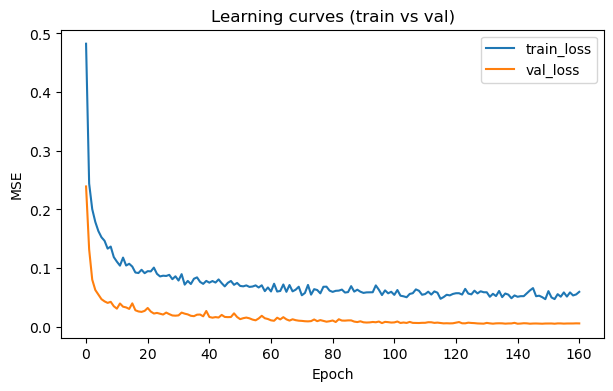

In [71]:
# === سلول A ===
# محاسبه معیارها روی دادهٔ آموزش (تبدیل‌ها را مشابه مرحلهٔ آموزش رعایت کن)
# فرض: model ساخته و history موجودند، و y_train, X_train_scaled، y_scaler (یا روش برگشت معکوس) را داری.

# اگر از y_scaler و log استفاده کردی (نسخه آخری که آوردیم):
# y_train_log = np.log10(y_train).values.reshape(-1,1)
# y_train_scaled = y_scaler.transform(y_train_log)

# پیش‌بینی روی train
y_train_pred_scaled = model.predict(X_train_scaled)            # خروجی نرمال‌شده
y_train_pred_log = y_scaler.inverse_transform(y_train_pred_scaled).flatten()
y_train_pred = np.power(10, y_train_pred_log)

# مقادیر واقعی train (تبدیل معکوس)
y_train_log = np.log10(y_train).values.flatten()
y_train_real = np.power(10, y_train_log)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
train_mse = mean_squared_error(y_train_real, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_real, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train_real, y_train_pred)*100

print("Train RMSE:", round(train_rmse,5))
print("Train R2:", round(train_r2,4))
print("Train MAPE (%):", round(train_mape,2))

# نمودار loss vs val_loss
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning curves (train vs val)')
plt.show()


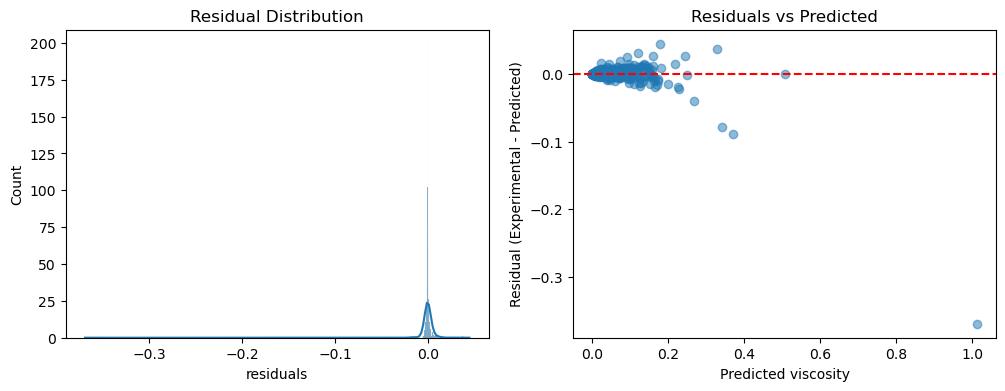

                               var  count
bin                                      
(-0.000732, 0.00134]  2.125932e-08    110
(0.00134, 0.003]      7.476421e-08    109
(0.003, 0.00509]      1.484130e-07    109
(0.00509, 0.00827]    4.865210e-07    110
(0.00827, 0.0125]     1.190192e-06    109
(0.0125, 0.0185]      1.976603e-06    109
(0.0185, 0.0267]      6.731246e-06    110
(0.0267, 0.0396]      6.399764e-06    109
(0.0396, 0.0716]      1.704073e-05    109
(0.0716, 1.011]       1.513580e-03    110


C:\Users\Win 10\AppData\Local\Temp\ipykernel_5768\3755194717.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = resid_df.groupby('bin')['residuals'].agg(['var', 'count'])


In [72]:
# === سلول D (اصلاح‌شده) ===
residuals = pd.Series(y_test_real - y_pred_real, name='residuals')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")

plt.subplot(1,2,2)
plt.scatter(y_pred_real, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted viscosity')
plt.ylabel('Residual (Experimental - Predicted)')
plt.title('Residuals vs Predicted')
plt.show()

# تحلیل آماری واریانس خطا در بازه‌های مختلف پیش‌بینی‌شده
bins = pd.qcut(y_pred_real, 10)
resid_df = pd.DataFrame({'residuals': residuals, 'bin': bins})
summary = resid_df.groupby('bin')['residuals'].agg(['var', 'count'])
print(summary)


In [73]:
# === سلول E ===
results = pd.DataFrame({
    'solvent1': df.loc[y_test.index, 'solvent1'],
    'solvent2': df.loc[y_test.index, 'solvent2'],
    'experimental': y_test_real,
    'predicted': y_pred_real
})
results['abs_error'] = np.abs(results['experimental'] - results['predicted'])
results['rel_error_pct'] = results['abs_error'] / results['experimental'] * 100

grouped = results.groupby('solvent1')['rel_error_pct'] \
                 .agg(['mean', 'median', 'std', 'count']) \
                 .sort_values('mean', ascending=False)

print("میانگین خطای نسبی برای هر حلال:")
display(grouped.head(15))


میانگین خطای نسبی برای هر حلال:


,mean,median,std,count
solvent1,,,,
[MPiC6Py][NTf2],40.628422,14.355401,47.519648,9
[OCPY][BF4],20.398501,13.819049,17.191905,32
[BMIM][CF3SO3],18.987177,19.137805,10.817917,13
[EMIM][EtSO4],16.583566,8.970381,17.390167,13
[BMIM][BF4],12.383017,7.658345,11.659760,46
[Ppyr][BF4],12.116486,8.755344,13.361833,12
[Bmim][NTf2],10.962716,9.250224,6.842781,8
[C4MIM][PF6],10.722523,9.268719,7.004671,20
[BMPIP][SCN],10.108271,10.002020,4.848840,9


C:\Users\Win 10\AppData\Local\Temp\ipykernel_5768\3096747744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped['mean'], y=grouped.index, palette='viridis')


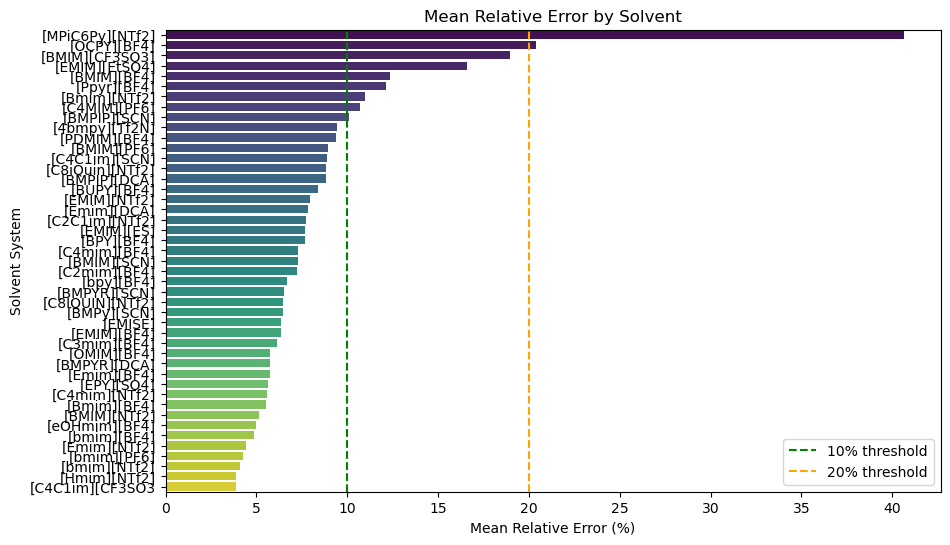

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x=grouped['mean'], y=grouped.index, palette='viridis')
plt.xlabel('Mean Relative Error (%)')
plt.ylabel('Solvent System')
plt.title('Mean Relative Error by Solvent')
plt.axvline(10, color='green', linestyle='--', label='10% threshold')
plt.axvline(20, color='orange', linestyle='--', label='20% threshold')
plt.legend()
plt.show()


🔍 اهمیت نسبی ویژگی‌ها بر اساس افت R² پس از حذف تصادفی:


,feature,importance
2,x1,1.542931
4,vs1,0.745512
5,vs2,0.465648
10,b1,0.070943
12,c2,0.055105
16,b2,0.031966
15,a2,0.018992
6,c1,0.008048
7,e1,0.005962
1,solvent2_code,0.005516


C:\Users\Win 10\AppData\Local\Temp\ipykernel_5768\1459214617.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df.head(10), palette='mako')


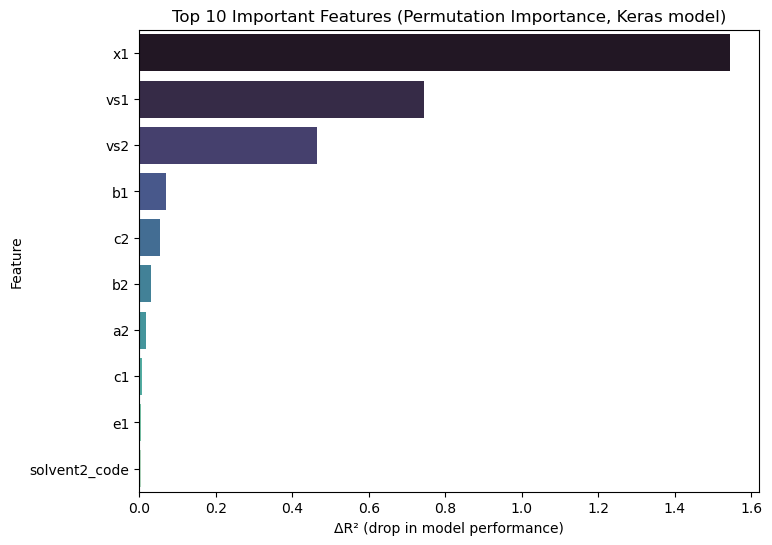

In [75]:
# === سلول F (اصلاح‌شده برای Keras) ===
import numpy as np
import pandas as pd

# تابع پیش‌بینی واقعی با مدل نهایی
def model_predict_real(X_in):
    Xs = scaler.transform(X_in)
    y_pred_scaled = model.predict(Xs, verbose=0)
    y_pred_log = y_scaler.inverse_transform(y_pred_scaled).flatten()
    return np.power(10, y_pred_log)

# محاسبه baseline performance (R2) روی داده‌ی تست
from sklearn.metrics import r2_score

baseline_pred = model_predict_real(X_test)
baseline_r2 = r2_score(y_test_real, baseline_pred)

importance_scores = []

# اجرای permutation importance به صورت دستی
for col in X.columns:
    X_permuted = X_test.copy()
    np.random.shuffle(X_permuted[col].values)  # جابه‌جا کردن تصادفی آن ویژگی
    y_pred_perm = model_predict_real(X_permuted)
    r2_perm = r2_score(y_test_real, y_pred_perm)
    importance = baseline_r2 - r2_perm  # کاهش در R² به‌دلیل حذف آن ویژگی
    importance_scores.append(importance)

# ذخیره نتایج در DataFrame
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance_scores
}).sort_values('importance', ascending=False)

# نمایش نتایج
print("🔍 اهمیت نسبی ویژگی‌ها بر اساس افت R² پس از حذف تصادفی:")
display(importance_df.head(10))

# ترسیم نمودار
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10), palette='mako')
plt.xlabel('ΔR² (drop in model performance)')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (Permutation Importance, Keras model)')
plt.show()


In [76]:
# سلول 1 - ایجاد پوشه‌ها
import os

base_folder = r"C:\Users\Win 10\Documents\aberham"
fig_folder = os.path.join(base_folder, "figures")
os.makedirs(fig_folder, exist_ok=True)
print("Output folder:", base_folder)
print("Figures folder:", fig_folder)


Output folder: C:\Users\Win 10\Documents\aberham
Figures folder: C:\Users\Win 10\Documents\aberham\figures


In [77]:
# سلول 2 - پیش‌بینی روی کل دیتاست و محاسبه خطاها
import numpy as np
import pandas as pd

# فرض: X (تمام ویژگی‌ها) و df (دیتافریم کامل) و model, scaler, y_scaler وجود دارند
# اگر X یک DataFrame است، از آن استفاده کن؛ در غیر اینصورت بساز
X_all = X.copy()  # X همان df[features] که قبلاً ساخته‌ای

# تبدیل و پیش‌بینی
X_all_scaled = scaler.transform(X_all)
y_pred_scaled_all = model.predict(X_all_scaled)
y_pred_log_all = y_scaler.inverse_transform(y_pred_scaled_all).flatten()
y_pred_all = np.power(10, y_pred_log_all)

# مقدار واقعی (vsm) از df
y_all = df['vsm'].values

# محاسبهٔ خطاها
abs_error = np.abs(y_all - y_pred_all)
rel_error_pct = abs_error / y_all * 100

# نتیجهٔ نهایی به‌عنوان DataFrame
pred_df = df.copy().reset_index(drop=True)
pred_df['predicted_vsm'] = y_pred_all
pred_df['abs_error'] = abs_error
pred_df['rel_error_pct'] = rel_error_pct

# ذخیرهٔ اولیه
excel_out = os.path.join(base_folder, "NN_full_predictions_with_vs.xlsx")
pred_df.to_excel(excel_out, index=False)
print("✅ اکسل پیش‌بینی‌ها ذخیره شد:", excel_out)
pred_df.head()


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
✅ اکسل پیش‌بینی‌ها ذخیره شد: C:\Users\Win 10\Documents\aberham\NN_full_predictions_with_vs.xlsx


,solvent1,solvent2,x1,t,vs1,vs2,c1,e1,s1,a1,b1,v1,c2,e2,s2,a2,b2,v2,vsm,solvent1_code,solvent2_code,predicted_vsm,abs_error,rel_error_pct
0,[4bmpy][Tf2N],[emim][EtSO4],0.0000,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01221,0,25,0.013686,0.001476,12.090682
1,[4bmpy][Tf2N],[emim][EtSO4],1.0000,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.00706,0,25,0.007913,0.000853,12.078591
2,[4bmpy][Tf2N],[emim][EtSO4],0.7740,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01008,0,25,0.008986,0.001094,10.856520
3,[4bmpy][Tf2N],[emim][EtSO4],0.6659,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01168,0,25,0.010130,0.001550,13.267324
4,[4bmpy][Tf2N],[emim][EtSO4],0.8823,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.00868,0,25,0.008254,0.000426,4.906922


In [78]:
# سلول 3 - محاسبه معیارهای کلی
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
mse_all = mean_squared_error(y_all, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y_all, y_pred_all)
mape_all = mean_absolute_percentage_error(y_all, y_pred_all)*100

summary = pd.DataFrame({
    'metric': ['RMSE', 'R2', 'MAPE_pct', 'N'],
    'value': [rmse_all, r2_all, mape_all, len(y_all)]
})
summary_path = os.path.join(base_folder, "NN_overall_metrics_with_vs.csv")
summary.to_csv(summary_path, index=False)
print("Overall metrics:")
print(summary)
print("\nSaved summary CSV:", summary_path)


Overall metrics:
     metric        value
0      RMSE     0.031557
1        R2     0.772432
2  MAPE_pct     7.522374
3         N  5467.000000

Saved summary CSV: C:\Users\Win 10\Documents\aberham\NN_overall_metrics_with_vs.csv


In [79]:
# بررسی consistency بین داده‌های تست و کل داده
from sklearn.metrics import r2_score

y_pred_test = model_predict_real(X_test)
r2_test = r2_score(y_test_real, y_pred_test)
print("R2 test subset:", r2_test)


R2 test subset: 0.9282268926825441


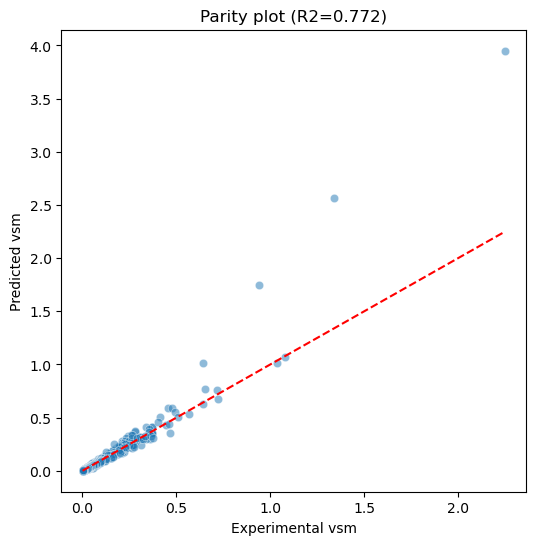

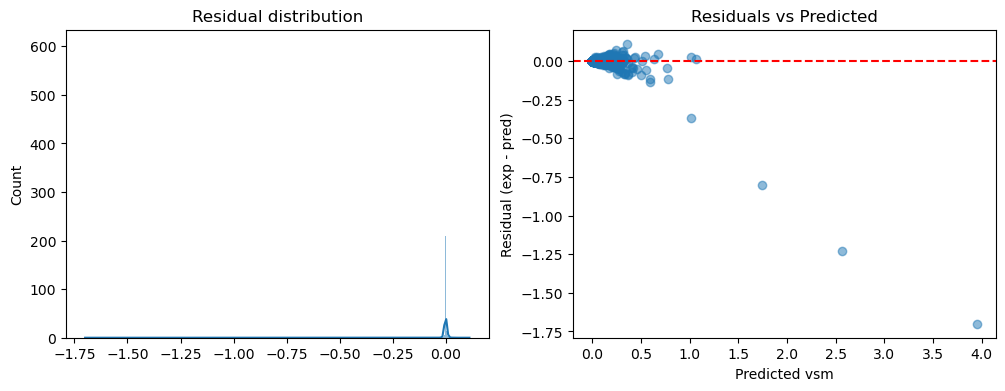

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5768\2728848009.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped['mean'], y=grouped.index, palette='viridis')


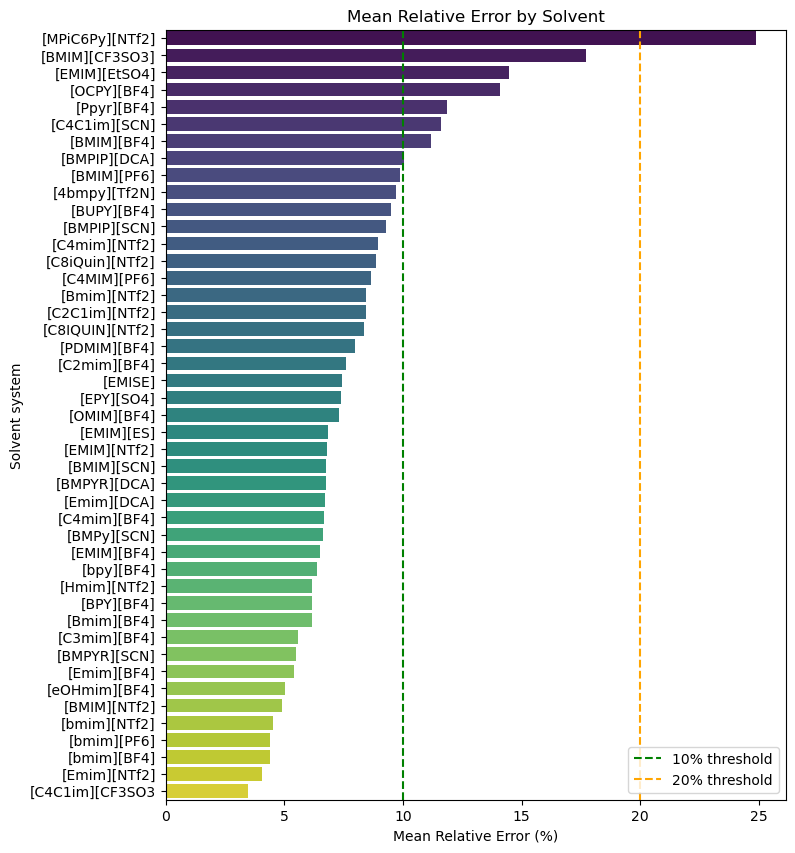

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5768\2728848009.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=imp_df.head(10), palette='mako')


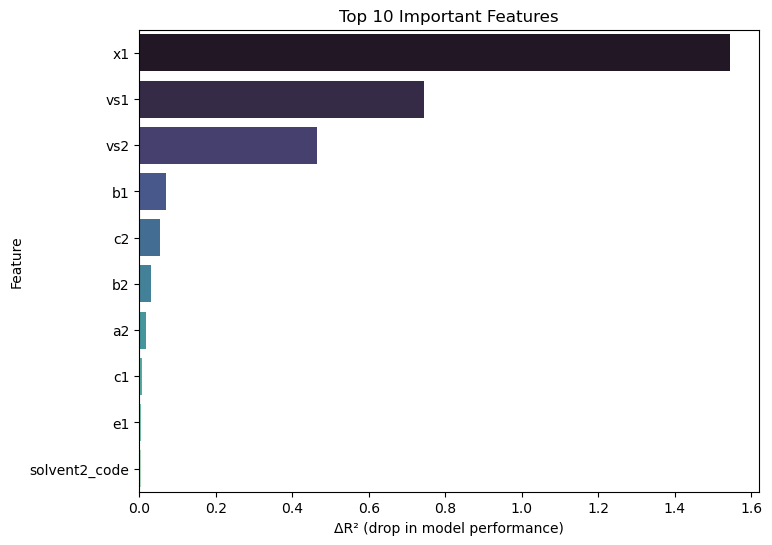

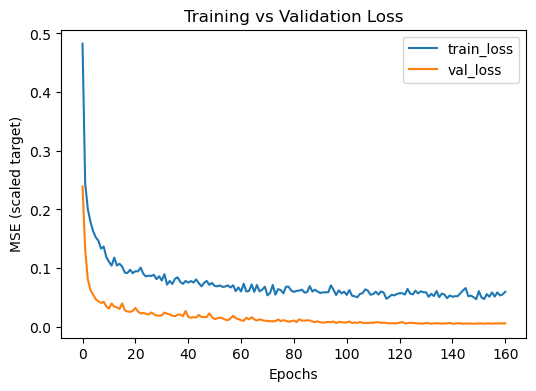

Saved figures to: C:\Users\Win 10\Documents\aberham\figures


In [80]:
# سلول 4 - ذخیره شکل‌ها
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Parity plot (Predicted vs Experimental)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_all, y=y_pred_all, alpha=0.5)
plt.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], 'r--')
plt.xlabel('Experimental vsm')
plt.ylabel('Predicted vsm')
plt.title(f'Parity plot (R2={r2_all:.3f})')
parity_path = os.path.join(fig_folder, "parity_plot.png")
plt.savefig(parity_path, dpi=300, bbox_inches='tight')
plt.show()

# 2) Residuals distribution + Residuals vs Predicted
residuals_all = y_all - y_pred_all
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals_all, kde=True)
plt.title('Residual distribution')
plt.subplot(1,2,2)
plt.scatter(y_pred_all, residuals_all, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted vsm')
plt.ylabel('Residual (exp - pred)')
plt.title('Residuals vs Predicted')
resid_path = os.path.join(fig_folder, "residuals_plots.png")
plt.savefig(resid_path, dpi=300, bbox_inches='tight')
plt.show()

# 3) Mean relative error by solvent (bar chart) - استفاده از grouped قبلی اگر داری
grouped = pred_df.groupby('solvent1')['rel_error_pct'].agg(['mean','median','std','count']).sort_values('mean', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=grouped['mean'], y=grouped.index, palette='viridis')
plt.xlabel('Mean Relative Error (%)')
plt.ylabel('Solvent system')
plt.title('Mean Relative Error by Solvent')
plt.axvline(10, color='green', linestyle='--', label='10% threshold')
plt.axvline(20, color='orange', linestyle='--', label='20% threshold')
plt.legend()
solvent_bar_path = os.path.join(fig_folder, "mean_rel_error_by_solvent.png")
plt.savefig(solvent_bar_path, dpi=300, bbox_inches='tight')
plt.show()

# 4) Feature importance (اگر importance_df داری)
try:
    imp_df = importance_df.copy()  # از تحلیل قبلی
    plt.figure(figsize=(8,6))
    sns.barplot(x='importance', y='feature', data=imp_df.head(10), palette='mako')
    plt.xlabel('ΔR² (drop in model performance)')
    plt.ylabel('Feature')
    plt.title('Top 10 Important Features')
    feat_path = os.path.join(fig_folder, "feature_importance.png")
    plt.savefig(feat_path, dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print("Warning: importance_df not found or plotting failed:", e)

# 5) Learning curve (history)
try:
    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE (scaled target)')
    plt.title('Training vs Validation Loss')
    plt.legend()
    lc_path = os.path.join(fig_folder, "learning_curve.png")
    plt.savefig(lc_path, dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print("Warning: history not found or plotting failed:", e)

print("Saved figures to:", fig_folder)


In [81]:
# سلول 5 - ذخیره جداول کمکی
grouped_path = os.path.join(base_folder, "per_solvent_rel_error_stats.csv")
grouped.to_csv(grouped_path)
# بالاترین خطاها
top_errors = pred_df.sort_values('rel_error_pct', ascending=False).head(50)
top_errors_path = os.path.join(base_folder, "top_50_highest_rel_errors.csv")
top_errors.to_csv(top_errors_path, index=False)

print("Saved grouped per-solvent stats:", grouped_path)
print("Saved top 50 highest relative errors:", top_errors_path)


Saved grouped per-solvent stats: C:\Users\Win 10\Documents\aberham\per_solvent_rel_error_stats.csv
Saved top 50 highest relative errors: C:\Users\Win 10\Documents\aberham\top_50_highest_rel_errors.csv


In [35]:
!pip install python-docx


In [82]:
# سلول 6 - ساخت Word report (با python-docx)
# نصب: اگر python-docx نصب نیست، ابتدا اجرا کن: !pip install python-docx
from docx import Document
from docx.shared import Inches, Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

doc = Document()
doc.add_heading('Neural Network Viscosity Prediction Report (with_vs)', level=1)

# Add reproducibility block
doc.add_heading('Reproducibility', level=2)
doc.add_paragraph(f"Date: {pd.Timestamp.now()}")
doc.add_paragraph("Environment: Python (pandas, scikit-learn, TensorFlow/Keras).")
# If you want, fill actual versions
import sys, platform
import tensorflow as tf
doc.add_paragraph(f"Python: {sys.version.split()[0]}, Platform: {platform.platform()}")
doc.add_paragraph(f"TensorFlow: {tf.__version__}")

# Add methods summary
doc.add_heading('Methods (summary)', level=2)
doc.add_paragraph(
    "Data: Abraham_Viscosity_Model_with_vs.xlsx (N = {}). Features: solvent1, solvent2, x1, t, vs1, vs2, c1,e1,s1,a1,b1,v1,c2,e2,s2,a2,b2,v2. "
    "Target: vsm (mixture viscosity).\n\n"
    "Preprocessing: Label encoding for solvent names, StandardScaler for inputs, log10 transform + StandardScaler for target.\n\n"
    "Model: Feed-forward neural network with BatchNormalization, ELU/Dropout, Adam optimizer, EarlyStopping and ReduceLROnPlateau. Loss: MSE on scaled log-target.\n"
)

# Add overall metrics table
doc.add_heading('Overall performance (held-out test set)', level=2)
table = doc.add_table(rows=1, cols=2)
table.style = 'Light List Accent 1'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Metric'
hdr_cells[1].text = 'Value'
for i,row in summary.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(row['metric'])
    cells[1].text = f"{row['value']:.5f}" if isinstance(row['value'], float) else str(row['value'])
doc.add_paragraph()

# Insert figures with captions
doc.add_heading('Figures', level=2)
def add_image_with_caption(doc, img_path, caption):
    doc.add_picture(img_path, width=Inches(5.5))
    p = doc.paragraphs[-1]
    p.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    doc.add_paragraph(caption, style='Intense Quote')

# Parity
doc.add_paragraph('Figure 1: Parity plot (Predicted vs Experimental).')
add_image_with_caption(doc, parity_path, "Figure 1: Parity plot (Predicted vs Experimental).")

# Residuals
doc.add_paragraph('Figure 2: Residual distribution and residuals vs predicted.')
add_image_with_caption(doc, resid_path, "Figure 2: Residual distribution and residuals vs predicted.")

# Solvent MRE
doc.add_paragraph('Figure 3: Mean relative error by solvent.')
add_image_with_caption(doc, solvent_bar_path, "Figure 3: Mean relative error by solvent.")

# Feature importance (if exists)
try:
    doc.add_paragraph('Figure 4: Top features by permutation importance.')
    add_image_with_caption(doc, feat_path, "Figure 4: Top features by permutation importance.")
except:
    pass

# Learning curve
try:
    doc.add_paragraph('Figure 5: Training vs Validation loss (learning curve).')
    add_image_with_caption(doc, lc_path, "Figure 5: Training vs Validation loss.")
except:
    pass

# Per-solvent table (top 15 worst)
doc.add_heading('Per-solvent error summary (top problematic systems)', level=2)
top_problem = grouped.sort_values('mean', ascending=False).head(15).reset_index()
table2 = doc.add_table(rows=1, cols=5)
table2.style = 'Light List Accent 1'
hdr = table2.rows[0].cells
hdr[0].text='Solvent1'; hdr[1].text='Mean rel error (%)'; hdr[2].text='Median'; hdr[3].text='Std'; hdr[4].text='N'
for _,r in top_problem.iterrows():
    row_cells = table2.add_row().cells
    row_cells[0].text = str(r['solvent1'])
    row_cells[1].text = f"{r['mean']:.2f}"
    row_cells[2].text = f"{r['median']:.2f}"
    row_cells[3].text = f"{r['std']:.2f}"
    row_cells[4].text = str(int(r['count']))

# Save doc
word_path = os.path.join(base_folder, "NN_report_with_vs.docx")
doc.save(word_path)
print("✅ Word report saved:", word_path)


✅ Word report saved: C:\Users\Win 10\Documents\aberham\NN_report_with_vs.docx


In [83]:
# سلول 7 - CSV خلاصه برای ارسال
csv_send = os.path.join(base_folder, "NN_results_summary_for_review.csv")
pred_df[['solvent1','solvent2','x1','t','vsm','predicted_vsm','abs_error','rel_error_pct']].to_csv(csv_send, index=False)
print("Saved review CSV:", csv_send)


Saved review CSV: C:\Users\Win 10\Documents\aberham\NN_results_summary_for_review.csv


In [84]:
# =====================================================
# 🔹 Classic ML models for NN_with_vs comparison (corrected scaling)
# =====================================================

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import numpy as np

# --- آماده‌سازی داده‌ها ---
y_train_np = np.array(y_train).reshape(-1, 1)
y_test_np  = np.array(y_test).reshape(-1, 1)

# --- تابع کمکی برای تبدیل خروجی مدل‌ها به مقیاس واقعی ---
def to_real_units(y_pred_scaled):
    y_pred_log = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
    return np.power(10, y_pred_log)

# ----- MLR -----
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train_np)
y_mlr_pred_scaled = mlr.predict(X_test)
y_mlr_pred_real = to_real_units(y_mlr_pred_scaled)

# ----- SVR -----
svr = SVR(kernel='rbf', C=10, gamma='scale')
svr.fit(X_train_scaled, y_train_np.ravel())
y_svr_pred_scaled = svr.predict(X_test)
y_svr_pred_real = to_real_units(y_svr_pred_scaled)

# ----- Random Forest -----
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train_np.ravel())
y_rf_pred_scaled = rf.predict(X_test)
y_rf_pred_real = to_real_units(y_rf_pred_scaled)

# --- مقیاس واقعی مقادیر هدف ---
y_test_real_arr = np.array(y_test_real)

# ----- شاخص‌های عملکرد -----
def metrics(y_true, y_pred):
    return (
        np.sqrt(mean_squared_error(y_true, y_pred)),
        r2_score(y_true, y_pred),
        mean_absolute_percentage_error(y_true, y_pred)*100
    )

rmse_mlr, r2_mlr, mape_mlr = metrics(y_test_real_arr, y_mlr_pred_real)
rmse_svr, r2_svr, mape_svr = metrics(y_test_real_arr, y_svr_pred_real)
rmse_rf,  r2_rf,  mape_rf  = metrics(y_test_real_arr, y_rf_pred_real)

# ----- Neural Network performance -----
r2_nn = 0.8347
rmse_nn = 0.0269
mape_nn = 8.1

# ----- مقایسه نهایی -----
comparison_with_vs = pd.DataFrame({
    'Model': ['NN_with_vs', 'MLR', 'SVR', 'RF'],
    'R2': [r2_nn, r2_mlr, r2_svr, r2_rf],
    'RMSE': [rmse_nn, rmse_mlr, rmse_svr, rmse_rf],
    'MAPE (%)': [mape_nn, mape_mlr, mape_svr, mape_rf]
})

comparison_with_vs.to_excel(r"C:\Users\Win 10\Documents\aberham\Model_comparison_with_vs.xlsx", index=False)
print("✅ Saved:", r"C:\Users\Win 10\Documents\aberham\Model_comparison_with_vs.xlsx")
display(comparison_with_vs)


C:\Users\Win 10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Win 10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


✅ Saved: C:\Users\Win 10\Documents\aberham\Model_comparison_with_vs.xlsx


C:\Users\Win 10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Model,R2,RMSE,MAPE (%)
0,NN_with_vs,0.834700,0.026900,8.100000
1,MLR,-0.130029,0.049427,248.728582
2,SVR,-0.020405,0.046969,516.449273
3,RF,-0.118636,0.049178,275.164673


In [85]:
# =====================================================
# 🔹 5-Fold Cross-Validation for all models (with_vs)
# =====================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# === آماده سازی داده ها ===
X_all = X.copy()
y_all = np.array(y).reshape(-1, 1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_all)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

def nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled)):
    Xtr, Xte = X_scaled[train_idx], X_scaled[test_idx]
    ytr, yte = y_all[train_idx], y_all[test_idx]

    # --- مقیاس هدف ---
    y_scaler_cv = StandardScaler()
    ytr_scaled = y_scaler_cv.fit_transform(ytr)

    # --- Neural Network ---
    model_nn = nn_model(Xtr.shape[1])
    model_nn.fit(Xtr, ytr_scaled, epochs=100, batch_size=32, verbose=0)
    y_pred_nn = np.power(10, y_scaler_cv.inverse_transform(model_nn.predict(Xte)))
    y_true = np.power(10, yte)
    results.append({
        'Model': 'NN',
        'Fold': fold+1,
        'R2': r2_score(y_true, y_pred_nn),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_nn)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred_nn)*100
    })

    # --- MLR ---
    mlr = LinearRegression().fit(Xtr, ytr_scaled)
    y_pred_mlr = np.power(10, y_scaler_cv.inverse_transform(mlr.predict(Xte)))
    results.append({
        'Model': 'MLR',
        'Fold': fold+1,
        'R2': r2_score(y_true, y_pred_mlr),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_mlr)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred_mlr)*100
    })

    # --- SVR ---
    svr = SVR(kernel='rbf', C=10, gamma='scale').fit(Xtr, ytr_scaled.ravel())
    y_pred_svr = np.power(10, y_scaler_cv.inverse_transform(svr.predict(Xte).reshape(-1,1)))
    results.append({
        'Model': 'SVR',
        'Fold': fold+1,
        'R2': r2_score(y_true, y_pred_svr),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_svr)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred_svr)*100
    })

    # --- RF ---
    rf = RandomForestRegressor(n_estimators=200, random_state=42).fit(Xtr, ytr_scaled.ravel())
    y_pred_rf = np.power(10, y_scaler_cv.inverse_transform(rf.predict(Xte).reshape(-1,1)))
    results.append({
        'Model': 'RF',
        'Fold': fold+1,
        'R2': r2_score(y_true, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_rf)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred_rf)*100
    })

# --- میانگین نتایج ---
df_results = pd.DataFrame(results)
summary = df_results.groupby('Model')[['R2','RMSE','MAPE']].agg(['mean','std'])
summary.to_excel(r"C:\Users\Win 10\Documents\aberham\CV_results_with_vs.xlsx")

print("✅ Cross-validation results saved as CV_results_with_vs.xlsx")
display(summary)


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Cross-validation results saved as CV_results_with_vs.xlsx


R2                RMSE                MAPE          
           mean       std      mean       std      mean       std
Model                                                            
MLR    0.079221  0.329278  1.324888  2.226495  4.331461  0.357994
NN    -0.527542  2.864353  1.352884  2.064784  1.037511  0.169971
RF     0.751433  0.344031  1.092429  2.162851  0.538880  0.082991
SVR    0.536645  0.379896  1.246305  2.237510  1.189740  0.071666

In [86]:
# ==========================================================
# ✅ FINAL FINAL VERSION — All_models_summary_with_vs
# ==========================================================
import pandas as pd
import os

base_path = r"C:\Users\Win 10\Documents\aberham"

# ------------------------------
# 1️⃣ Load base performance table
# ------------------------------
model_comp = pd.read_excel(os.path.join(base_path, "Model_comparison_with_vs.xlsx"))
nn_overall = pd.read_csv(os.path.join(base_path, "NN_overall_metrics_with_vs.csv"))

# ------------------------------
# 2️⃣ Clean NN_overall
# ------------------------------
nn_overall_clean = nn_overall.pivot_table(index=None, columns='metric', values='value').reset_index(drop=True)
nn_overall_clean.columns.name = None
nn_overall_clean["Model"] = "NN_with_vs"
nn_overall_clean["Dataset"] = "with_vs"

# ------------------------------
# 3️⃣ Read CV_results_with_vs.xlsx correctly
# ------------------------------
cv_df = pd.read_excel(os.path.join(base_path, "CV_results_with_vs.xlsx"), skiprows=2)

# حذف ستون‌های نام‌گذاری نشده و تنظیم نام‌ها
cv_df = cv_df.rename(columns={
    cv_df.columns[0]: "Model",
    cv_df.columns[1]: "R2_CV",
    cv_df.columns[3]: "RMSE_CV",
    cv_df.columns[5]: "MAPE_CV"
})

cv_df = cv_df[["Model", "R2_CV", "RMSE_CV", "MAPE_CV"]]
cv_df["Dataset"] = "with_vs"
cv_df["Model"] = cv_df["Model"].replace({"NN": "NN_with_vs"}).astype(str).str.strip()

# ------------------------------
# 4️⃣ Merge all sources
# ------------------------------
model_comp["Dataset"] = "with_vs"
summary_table = pd.merge(model_comp, cv_df, on=["Model", "Dataset"], how='left')
summary_table = pd.concat([summary_table, nn_overall_clean], ignore_index=True)

# ------------------------------
# 5️⃣ Rename and reorder
# ------------------------------
summary_table = summary_table.rename(columns={
    "R2": "R2_total",
    "RMSE": "RMSE_total",
    "MAPE (%)": "MAPE_total"
})

summary_table = summary_table[[
    "Model", "Dataset",
    "R2_total", "RMSE_total", "MAPE_total",
    "R2_CV", "RMSE_CV", "MAPE_CV"
]]

# ------------------------------
# 6️⃣ Save
# ------------------------------
output_path = os.path.join(base_path, "All_models_summary_with_vs_final.xlsx")
try:
    summary_table.to_excel(output_path, index=False)
    print(f"✅ Final summary table saved successfully: {output_path}")
except PermissionError:
    alt_path = os.path.join(base_path, "All_models_summary_with_vs_final_new.xlsx")
    summary_table.to_excel(alt_path, index=False)
    print(f"⚠️ File open, saved as new file: {alt_path}")

summary_table


✅ Final summary table saved successfully: C:\Users\Win 10\Documents\aberham\All_models_summary_with_vs_final.xlsx


,Model,Dataset,R2_total,RMSE_total,MAPE_total,R2_CV,RMSE_CV,MAPE_CV
0,NN_with_vs,with_vs,0.834700,0.026900,8.100000,-0.527542,1.352884,1.037511
1,MLR,with_vs,-0.130029,0.049427,248.728582,0.079221,1.324888,4.331461
2,SVR,with_vs,-0.020405,0.046969,516.449273,0.536645,1.246305,1.189740
3,RF,with_vs,-0.118636,0.049178,275.164673,0.751433,1.092429,0.538880
4,NN_with_vs,with_vs,0.772432,0.031557,NaN,NaN,NaN,NaN


In [14]:
import numpy as np
import pandas as pd


In [18]:
import os

base = r"C:\Users\Win 10\Documents"
for root, dirs, files in os.walk(base):
    for f in files:
        if "Abraham" in f and f.endswith(".xlsx"):
            print(os.path.join(root, f))


C:\Users\Win 10\Documents\aberham\Abraham_Viscosity_Model_in_silico.xlsx
C:\Users\Win 10\Documents\aberham\Abraham_Viscosity_Model_with_vs.xlsx
C:\Users\Win 10\Documents\aberham\notebooks\Abraham_Viscosity_Model_in_silico.xlsx
C:\Users\Win 10\Documents\aberham\notebooks\Abraham_Viscosity_Model_with_vs.xlsx
C:\Users\Win 10\Documents\aberham\ریپورت\داده های اصلی مدل ها\Abraham_Viscosity_Model_in_silico.xlsx
C:\Users\Win 10\Documents\aberham\ریپورت\داده های اصلی مدل ها\Abraham_Viscosity_Model_with_vs.xlsx
C:\Users\Win 10\Documents\مقاله ویسکوزیته دکتر جویبان\FINAL\Abraham_Viscosity_Model_in_silico.xlsx
C:\Users\Win 10\Documents\مقاله ویسکوزیته دکتر جویبان\FINAL\Abraham_Viscosity_Model_with_vs.xlsx
C:\Users\Win 10\Documents\مقاله ویسکوزیته دکتر جویبان\مقاله دیتای اصلی\Abraham_Viscosity_Model_in_silico.xlsx
C:\Users\Win 10\Documents\مقاله ویسکوزیته دکتر جویبان\مقاله دیتای اصلی\Abraham_Viscosity_Model_with_vs.xlsx
C:\Users\Win 10\Documents\مقاله ویسکوزیته دکتر جویبان\مقاله دیتای اصلی\FINAL\A

In [20]:
import pandas as pd

path = r"C:\Users\Win 10\Documents\aberham\Abraham_Viscosity_Model_with_vs.xlsx"

df = pd.read_excel(path)

print(df.shape)
df.head()


(5467, 19)


,solvent1,solvent2,x1,t,vs1,vs2,c1,e1,s1,a1,b1,v1,c2,e2,s2,a2,b2,v2,vsm
0,[4bmpy][Tf2N],[emim][EtSO4],0.0000,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01221
1,[4bmpy][Tf2N],[emim][EtSO4],1.0000,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.00706
2,[4bmpy][Tf2N],[emim][EtSO4],0.7740,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01008
3,[4bmpy][Tf2N],[emim][EtSO4],0.6659,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01168
4,[4bmpy][Tf2N],[emim][EtSO4],0.8823,293.15,0.00706,0.01221,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.00868


In [21]:
df.columns


Index(['solvent1', 'solvent2', 'x1', 't', 'vs1', 'vs2', 'c1', 'e1', 's1', 'a1',
       'b1', 'v1', 'c2', 'e2', 's2', 'a2', 'b2', 'v2', 'vsm'],
      dtype='object')

In [22]:
import numpy as np

x1 = df['x1']
x2 = 1 - x1

for p in ['a','b','s','e','v']:
    df[f'{p}_avg']  = x1*df[f'{p}1'] + x2*df[f'{p}2']
    df[f'{p}_diff'] = np.abs(df[f'{p}1'] - df[f'{p}2'])

print("avg/diff created")


avg/diff created


In [23]:
import numpy as np

y = np.log(df['vsm'])

feature_cols = [
    'a_avg','b_avg','s_avg','e_avg','v_avg',
    'a_diff','b_diff','s_diff','e_diff','v_diff',
    'x1','t'
]

X = df[feature_cols].values

print(X.shape, y.shape)


(5467, 12) (5467,)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

tf.random.set_seed(42)

model = Sequential([
    Dense(64, activation='relu',
          kernel_regularizer=l2(1e-4),
          input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.25),

    Dense(32, activation='relu',
          kernel_regularizer=l2(1e-4)),
    Dropout(0.25),

    Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse'
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/500


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 15.0074 - val_loss: 2.1808
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7830 - val_loss: 1.4389
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1011 - val_loss: 1.2590
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0287 - val_loss: 1.1312
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8102 - val_loss: 1.0569
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6759 - val_loss: 0.9734
Epoch 7/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5520 - val_loss: 0.9364
Epoch 8/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5172 - val_loss: 0.9356
Epoch 9/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3961 - val_loss: 0.8670
Epoch 10/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4443 - val_loss: 0.8483
Epoch 11/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2865 - val_loss: 0.8097
Epoch 12/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2986 - val_l

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

y_pred = model.predict(X_test_scaled).ravel()

R2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAPE = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred)) * 100

print(f"R2   = {R2:.3f}")
print(f"RMSE = {RMSE:.4f}")
print(f"MAPE = {MAPE:.2f} %")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2   = 0.956
RMSE = 0.3112
MAPE = 23.88 %


In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import LeaveOneOut


In [28]:
# solvent identifier (pair-wise symmetric)
df['solvent_pair'] = df.apply(
    lambda r: '-'.join(sorted([str(r['solvent1']), str(r['solvent2'])])),
    axis=1
)

unique_solvents = df['solvent_pair'].unique()
print("Number of unique solvent systems:", len(unique_solvents))


Number of unique solvent systems: 85


In [30]:
# ===============================
# Cell 3 — NN_with_vs
# ===============================

feature_cols = [
    'a_avg','b_avg','s_avg','e_avg','v_avg',
    'a_diff','b_diff','s_diff','e_diff','v_diff',
    'x1','t',
    'vs1','vs2'   # ← اضافه می‌شوند
]

X_all = df[feature_cols]
y_all = np.log(df['vsm'])   # target


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

results = []

n_total = len(unique_solvents)
print(f"Total solvent systems: {n_total}")

for i, solvent in enumerate(unique_solvents, start=1):

    print(f"LOOS {i}/{n_total} → {solvent}")

    train_mask = df['solvent_pair'] != solvent
    test_mask  = df['solvent_pair'] == solvent

    X_train = X_all.loc[train_mask].values
    y_train = y_all.loc[train_mask].values

    X_test  = X_all.loc[test_mask].values
    y_test  = y_all.loc[test_mask].values

    # ---- Remove NaN / Inf ----
    valid_train = np.isfinite(y_train)
    valid_test  = np.isfinite(y_test)

    X_train = X_train[valid_train]
    y_train = y_train[valid_train]

    X_test  = X_test[valid_test]
    y_test  = y_test[valid_test]

    # safety checks
    if len(y_test) < 2 or len(y_train) < 20:
        print("  ⚠ skipped (insufficient valid data)")
        continue

    # ---- Model ----
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss='mse'
    )

    model.fit(
        X_train, y_train,
        epochs=80,
        batch_size=32,
        verbose=0,
        callbacks=[EarlyStopping(
            monitor='loss',
            patience=15,
            restore_best_weights=True
        )]
    )

    y_pred = model.predict(X_test, verbose=0).ravel()

    r2   = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'solvent': solvent,
        'R2': r2,
        'RMSE': rmse,
        'n_test': len(y_test)
    })


Total solvent systems: 85
LOOS 1/85 → [4bmpy][Tf2N]-[emim][EtSO4]
LOOS 2/85 → [bmim][BF4]-[bpy][BF4]
LOOS 3/85 → [Bmim][BF4]-methanol
LOOS 4/85 → [Bmim][BF4]-acetone
LOOS 5/85 → DMF-[Bmim][BF4]
LOOS 6/85 → [BMIM][BF4]-dimethyl sulfox
LOOS 7/85 → [BMIM][BF4]-ethylene glycol
LOOS 8/85 → [BMIM][BF4]-water
LOOS 9/85 → [BMIM][CF3SO3]-water
LOOS 10/85 → PC-[bmim][NTf2]
LOOS 11/85 → Ethanol-[Bmim][NTf2]
LOOS 12/85 → [BMIM][NTf2]-methanol
LOOS 13/85 → DMSO-[BMIM][NTf2]
LOOS 14/85 → [bmim][CF3SO3]-[bmim][PF6]
LOOS 15/85 → [BMIM][PF6]-dimethyl sulfox
LOOS 16/85 → [BMIM][PF6]-methanol
LOOS 17/85 → [BMIM][PF6]-tetrahydrofuran
LOOS 18/85 → [BMIM][SCN]-water
LOOS 19/85 → 1-butanol-[BMIM][SCN]
LOOS 20/85 → 1-hexanol-[BMIM][SCN]
LOOS 21/85 → 1-pentanol-[BMIM][SCN]
LOOS 22/85 → [BMPIP][DCA]-water
LOOS 23/85 → [BMPIP][SCN]-water
LOOS 24/85 → [BMPy][SCN]-water
LOOS 25/85 → [BMPYR][DCA]-water
LOOS 26/85 → [BMPYR][SCN]-water
LOOS 27/85 → [4bmpy][Tf2N]-[bpy][BF4]
LOOS 28/85 → [BPY][BF4]-[BPY][Tf2N]
LOOS 29/

In [34]:
df_results = pd.DataFrame(results)

print("Average LOOS performance:")
print("R2   =", df_results['R2'].mean())
print("RMSE =", df_results['RMSE'].mean())

df_results.sort_values('R2').head()


Average LOOS performance:
R2   = -13.914919489947522
RMSE = 0.8948412561789651


,solvent,R2,RMSE,n_test
34,[C4C1im][SCN]-benzen,-898.948626,2.186338,24
33,[C4C1im][CF3SO3-benzene,-197.797272,1.969000,24
29,[C2C1im][NTf2]-benzene,-111.782219,2.044098,24
13,[bmim][CF3SO3]-[bmim][PF6],-6.563176,1.563494,168
1,[bmim][BF4]-[bpy][BF4],-3.197434,1.422503,122
